<a href="https://colab.research.google.com/github/SWAYAMAWASTHI/SWAYAMAWASTHI/blob/main/BA_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [2]:
df = pd.read_csv('breast-cancer.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [6]:
px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])

In [7]:
px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [8]:
px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [9]:
px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [10]:
px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [11]:
px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [12]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [13]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [14]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [15]:
df.drop('id', axis=1, inplace=True)

In [16]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [18]:
corr = df.corr()

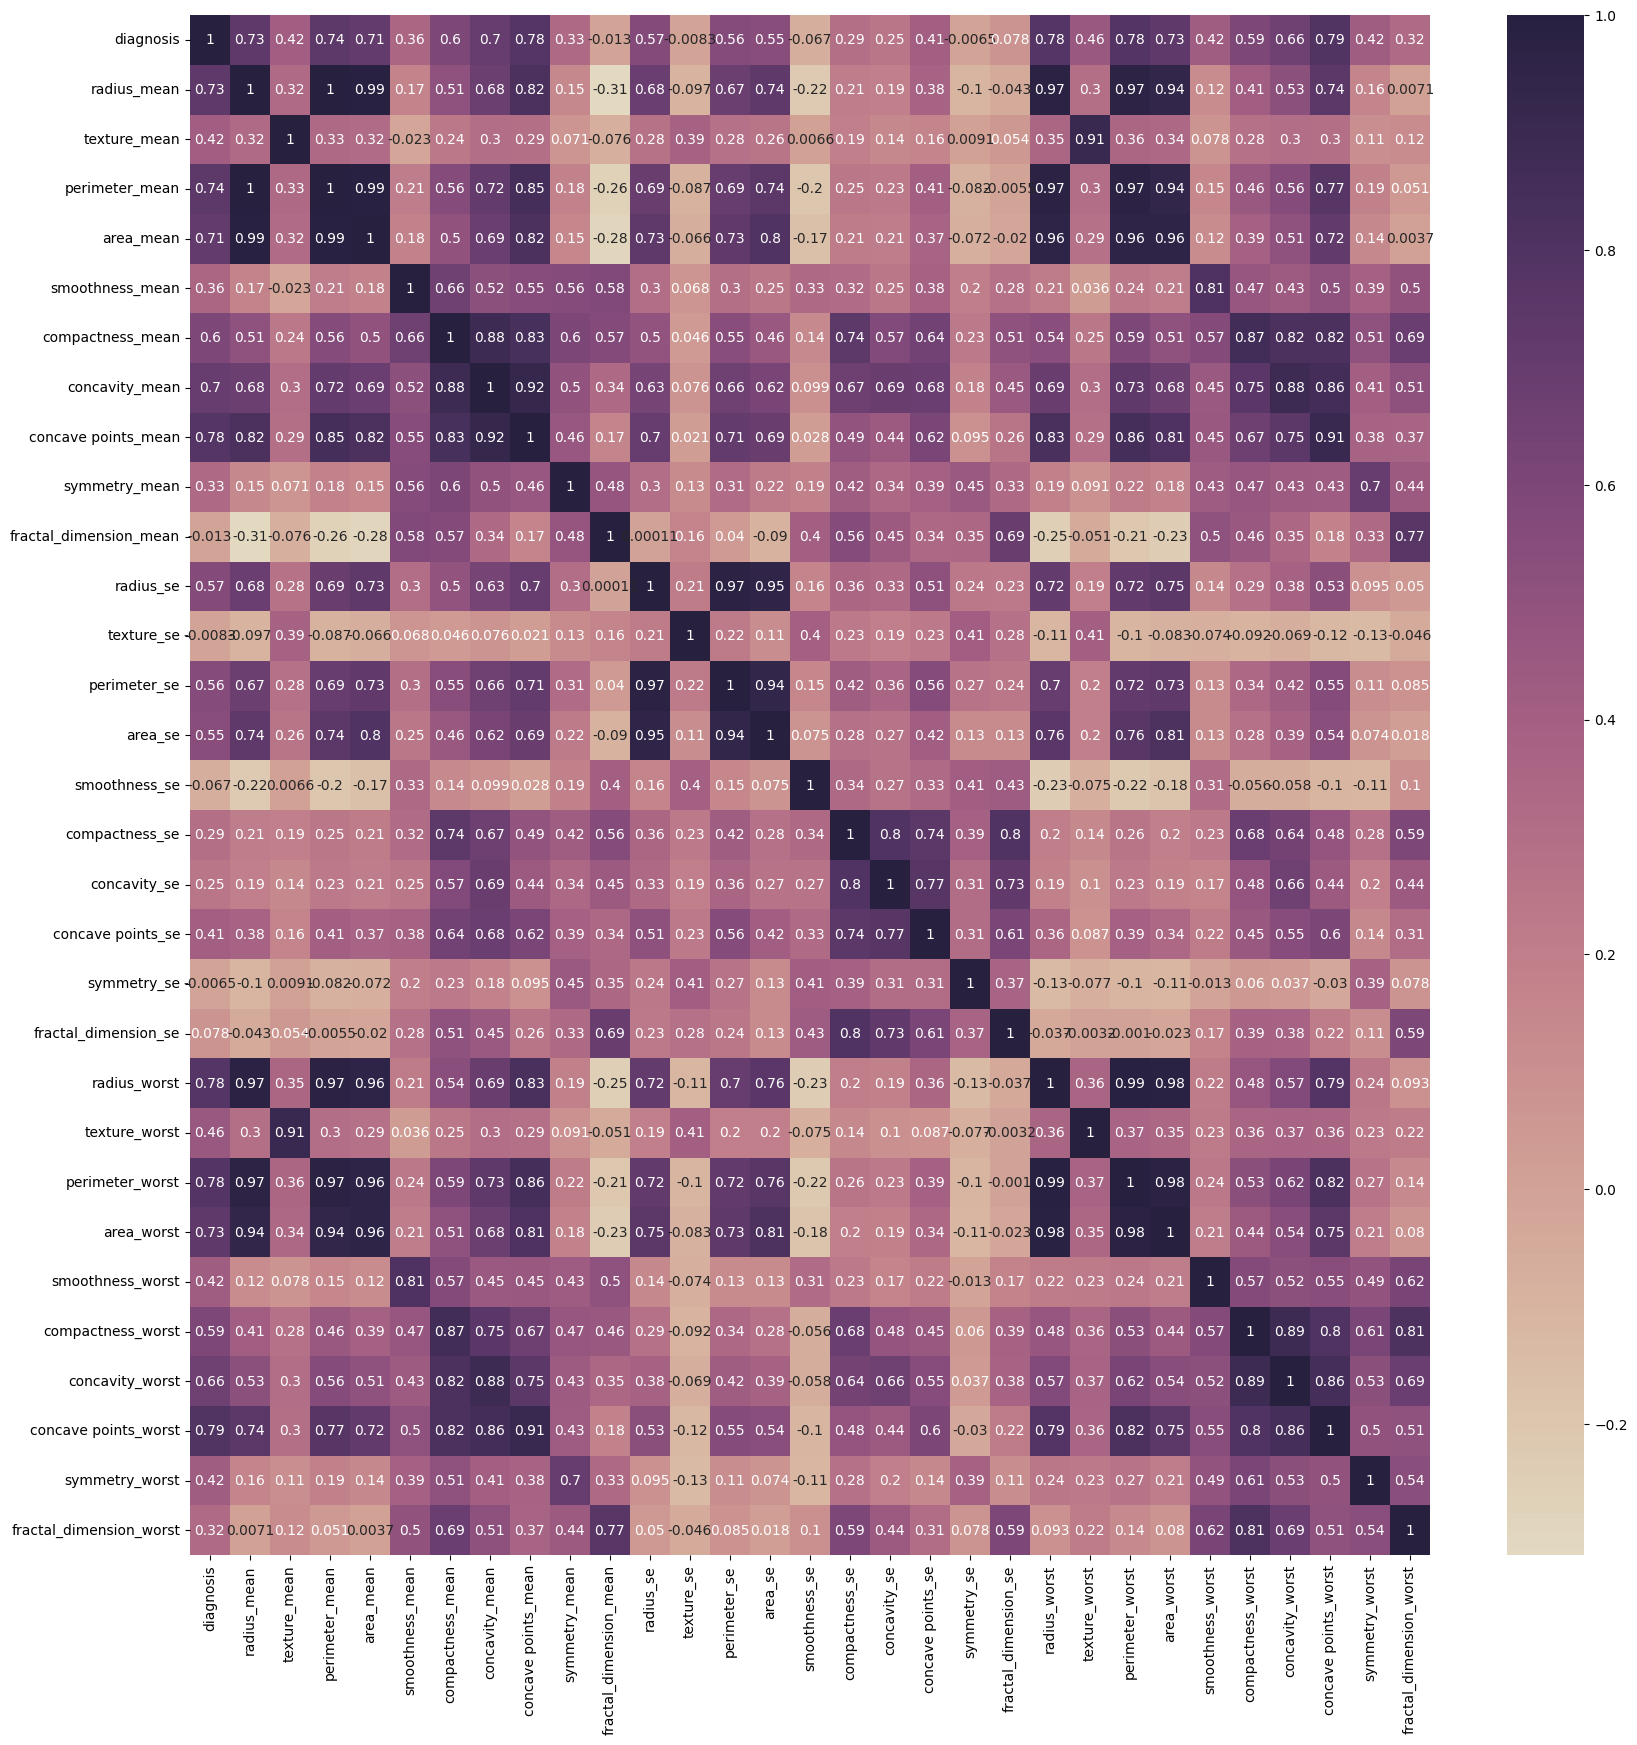

<ipython-input-19-48e1cae396ab>:12: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')


In [20]:
X = df[names]
y = df['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [22]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''

    model.fit(X_train, y_train)  #fit the model instance


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [44]:
lg = LogisticRegression()


results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [45]:
results.index = ['LogisticRegression']

In [46]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


In [47]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)


<ipython-input-47-91fd6d3cc998>:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [48]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**KNN**

In [49]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [50]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)



<ipython-input-50-48516387a940>:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [51]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**Random Forest Classifier**

In [52]:
rfc = RandomForestClassifier()

In [53]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

<ipython-input-53-a7febc514065>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [54]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**XGBoost**

In [55]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

<ipython-input-55-c69f628917a7>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [56]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


Naive Bayes

In [57]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

<ipython-input-57-16c499b41e8c>:5: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [58]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**Neural Network**

In [61]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):

    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=X.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=110)
predictions = model.predict(X_test)



Epoch 1/110
15/15 [==============================] - 2s 5ms/step - loss: 0.9981 - accuracy: 0.5319
Epoch 2/110
15/15 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.4440
Epoch 3/110
15/15 [==============================] - 0s 6ms/step - loss: 0.6382 - accuracy: 0.6176
Epoch 4/110
15/15 [==============================] - 0s 5ms/step - loss: 0.5949 - accuracy: 0.7912
Epoch 5/110
15/15 [==============================] - 0s 4ms/step - loss: 0.5650 - accuracy: 0.7560
Epoch 6/110
15/15 [==============================] - 0s 5ms/step - loss: 0.5338 - accuracy: 0.7714
Epoch 7/110
15/15 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.8110
Epoch 8/110
15/15 [==============================] - 0s 5ms/step - loss: 0.4500 - accuracy: 0.8264
Epoch 9/110
15/15 [==============================] - 0s 4ms/step - loss: 0.4286 - accuracy: 0.8242
Epoch 10/110
15/15 [==============================] - 0s 5ms/step - loss: 0.4042 - accuracy: 0.8440
Epoch 11/

In [62]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4)

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]],
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])


4/4 [==============================] - 0s 5ms/step


In [63]:
nn_df.index = ['NeuralNetwork']
results = results.append(nn_df)

<ipython-input-63-60bdc73dddfa>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [64]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
NeuralNetwork,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


**Trying all features**

In [68]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [72]:
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = results.append(LogisticRegression_all_features)

DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = results.append(DecisionTree_all_features)


KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = results.append(KNearsNeighbors_all_features)

RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = results.append(RandomForest_all_features)


XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = results.append(XGBoost_all_features)


Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']

results = results.append(Naive_Bayes_all_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

<ipython-input-72-42f0c8ee6929>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-42f0c8ee6929>:8: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-72-42f0c8ee6929>:14: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-inpu

In [70]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
LogisticRegression_all_features,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest_all_features,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
NeuralNetwork,0.956140,0.941176,0.952381,0.930233,0.951032


**Evaluation**

In [73]:
models = results.T.columns.values
models= models[0:7]


In [74]:
models


array(['LogisticRegression', 'DecisionTree', 'KNearsNeighbors',
       'RandomForest', 'XGBoost', 'NaiveBayes', 'NeuralNetwork'],
      dtype=object)

In [75]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [76]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

In [77]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [80]:
fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['recall'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

In [79]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

***Conclusion***


The Neural Network algorithm outperforms other algorithms in terms of recall and balanced accuracy.

Naive Bayes and K-Nearest Neighbors (KNN) algorithms perform similarly and achieve the highest precision scores.

Decision Tree is the only algorithm that performs better without feature selection.

**MEDIUM**

In [83]:
#make a dataframe
df = pd.read_csv('breast-cancer.csv')
#examine the shape of the data
df.shape
#get the column names
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<Axes: xlabel='count', ylabel='diagnosis'>

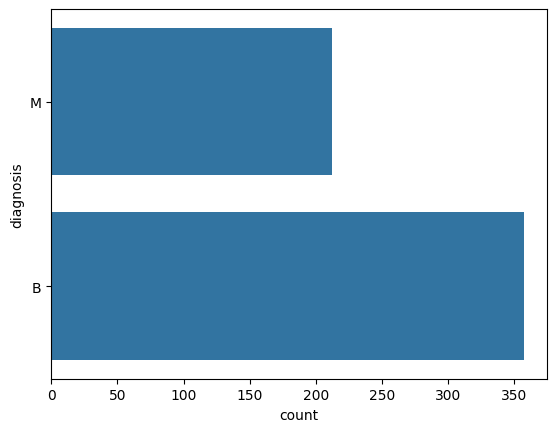

In [84]:
#Drop the column with all missing values (na, NAN, NaN)
#NOTE: This drops the column Unnamed: 32 column
df = df.dropna(axis=1)
#Get a count of the number of 'M' & 'B' cells
df['diagnosis'].value_counts()
#Visualize this count
sns.countplot(df['diagnosis'],label="Count")

In [85]:
# y includes diagnosis column with M or B values
y = df.diagnosis
# drop the column 'id' as it is does not convey any useful info
# drop diagnosis since we are separating labels and features
list = [‘id’,’diagnosis’]
# X includes our features
X = df.drop(list,axis = 1)
# get the first ten features
data_dia = y
data = X
data_std = (data — data.mean()) / (data.std()) # standardization
# get the first 10 features
data = pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars=”diagnosis”,
 var_name=”features”,
 value_name=’value’)
# make a violin plot
plt.figure(figsize=(10,10))
sns.violinplot(x=”features”, y=”value”, hue=”diagnosis”, data=data,split=True, inner=”quart”)
plt.xticks(rotation=90)

SyntaxError: invalid character '‘' (U+2018) (<ipython-input-85-eafdd0bba03b>, line 5)

<Axes: >

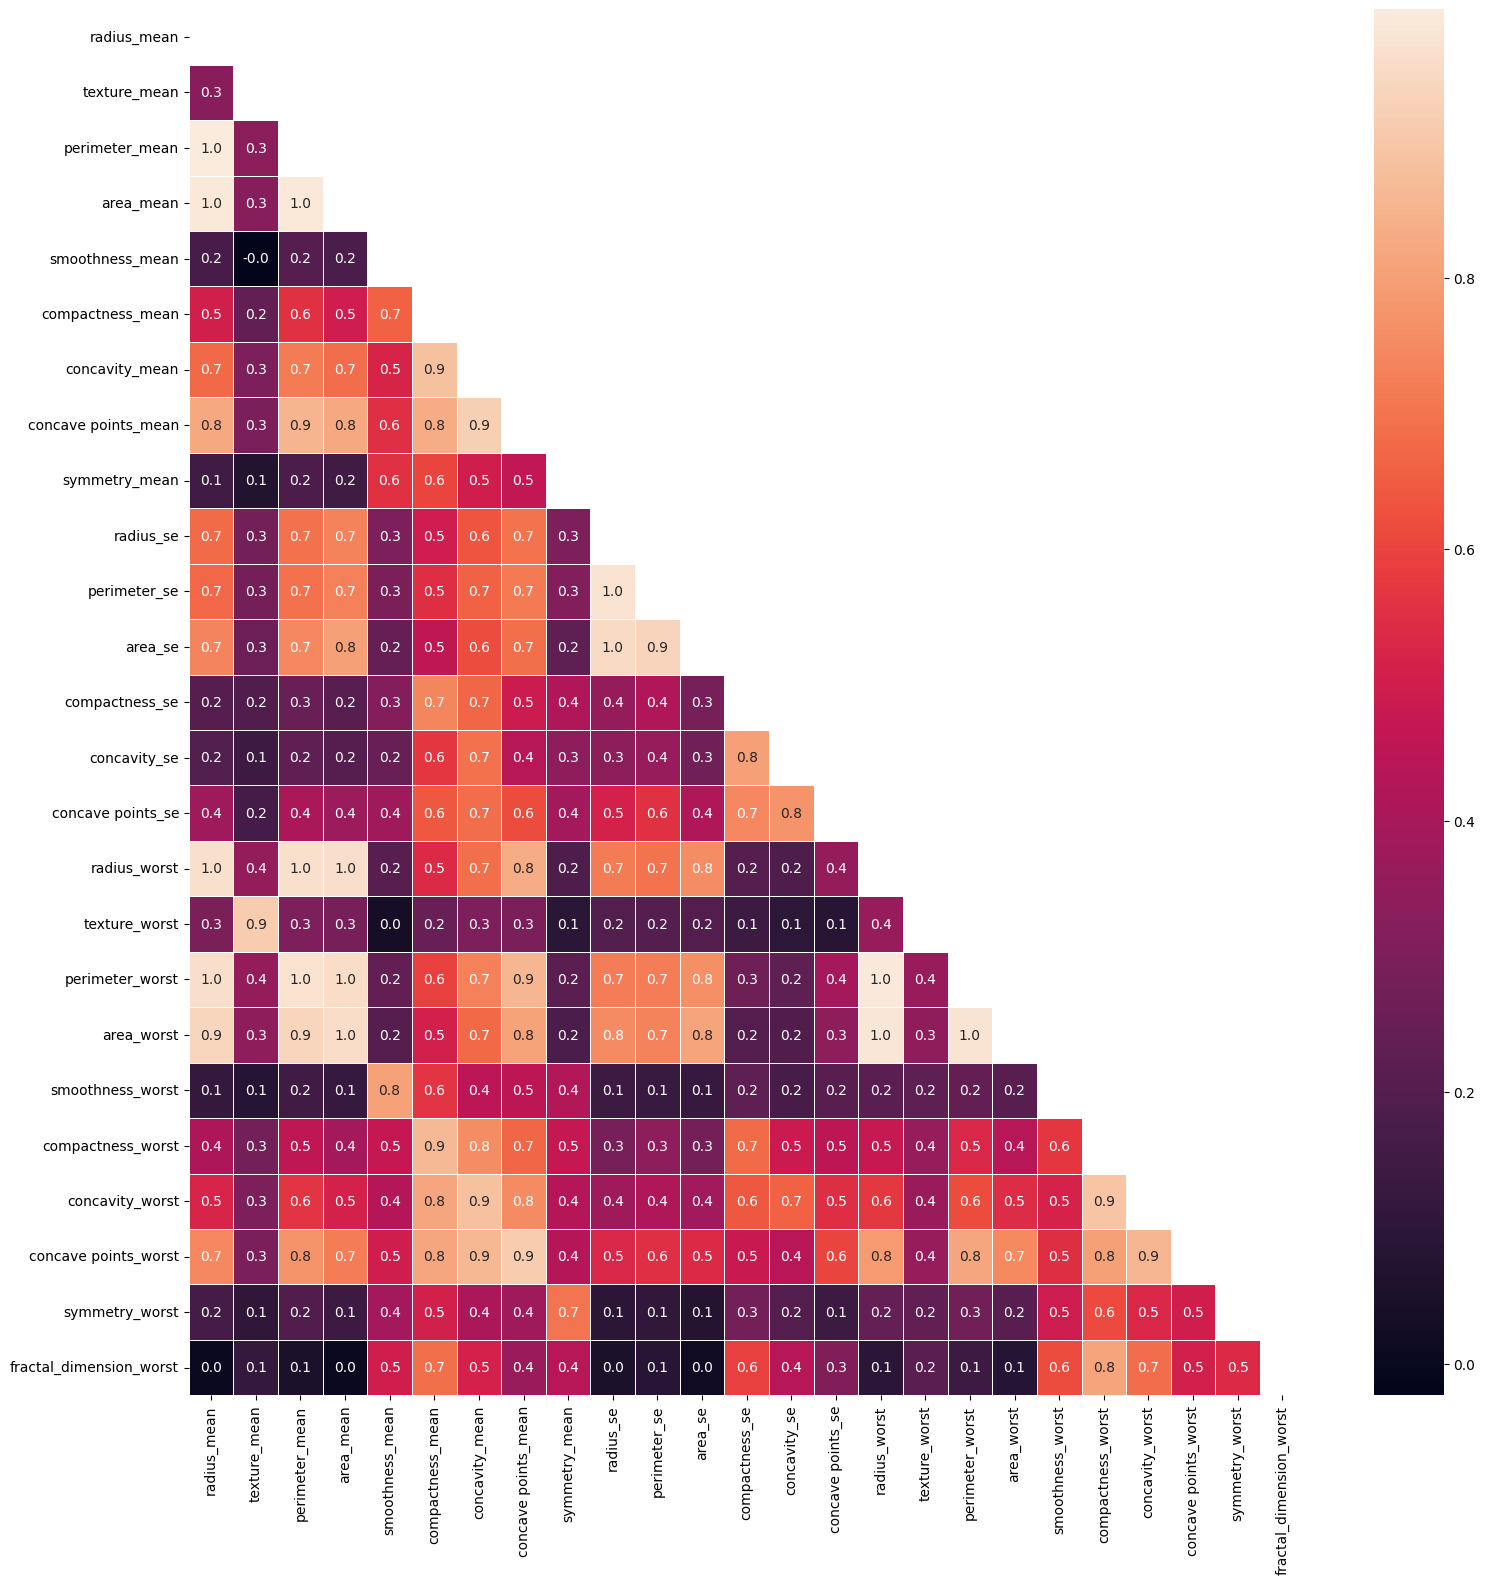

In [86]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)

In [87]:
# create boxplots for texture mean vs diagnosis of tumor
plot = sns.boxplot(x=’diagnosis’, y=’texture_mean’, data=df, showfliers=False)
plot.set_title(“Graph of texture mean vs diagnosis of tumor”)

SyntaxError: invalid character '’' (U+2019) (<ipython-input-87-6542b99c71b8>, line 2)

In [ ]:
# make a new dataframe with only the desired feature for t test
new = pd.DataFrame(data=df[[‘area_worst’, ‘diagnosis’]])
new = new.set_index(‘diagnosis’)
stats.ttest_ind(new_d.loc[‘M’], new_d.loc['B'])

In [ ]:
# Create correlation matrix
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# Drop features
X = X.drop(X[to_drop], axis=1)
X.columns

In [ ]:
#Encoding categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)
print(labelencoder_y.fit_transform(y))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, stratify=y, random_state = 17)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Define a function which trains models
def models(X_train,y_train):

  #Using Logistic Regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)
  #Using SVC linear
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)
  #Using SVC rbf
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel = 'rbf', random_state = 0)
    svc_rbf.fit(X_train, y_train)
  #Using DecisionTreeClassifier
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)
  #Using Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)

  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))
    print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))

    return log, svc_lin, svc_rbf, tree, forest
#get the training results
model = models(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):

 cm = confusion_matrix(y_test, model[i].predict(X_test))

 TN = cm[0][0]
 TP = cm[1][1]
 FN = cm[1][0]
 FP = cm[0][1]

 print(cm)
 print(‘Model[{}] Testing Accuracy = “{}”’.format(i, (TP + TN) / (TP + TN + FN + FP)))
 print()# Print a new line

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
 print(‘Model ‘,i)
 #Check precision, recall, f1-score
 print(classification_report(y_test, model[i].predict(X_test)))
 #Another way to get the models accuracy on the test data
 print(accuracy_score(y_test, model[i].predict(X_test)))
 print()#Print a new line

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
#make the scoring function with a beta = 2
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
# Create logistic regression
logistic = LogisticRegression()
# Create regularization penalty space
penalty = [‘l1’, ‘l2’]
# Create regularization hyperparameter space
C = np.arange(0, 1, 0.001)
# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, scoring=ftwo_scorer, verbose=0)
# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

In [ ]:
predictions = best_model.predict(X_test)
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

In [88]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['figure.dpi'] = 100

In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [90]:
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [92]:
#Value counts of unique data types in our dataframe
df.dtypes.value_counts()

float64    30
int64       1
dtype: int64

In [93]:
df[df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


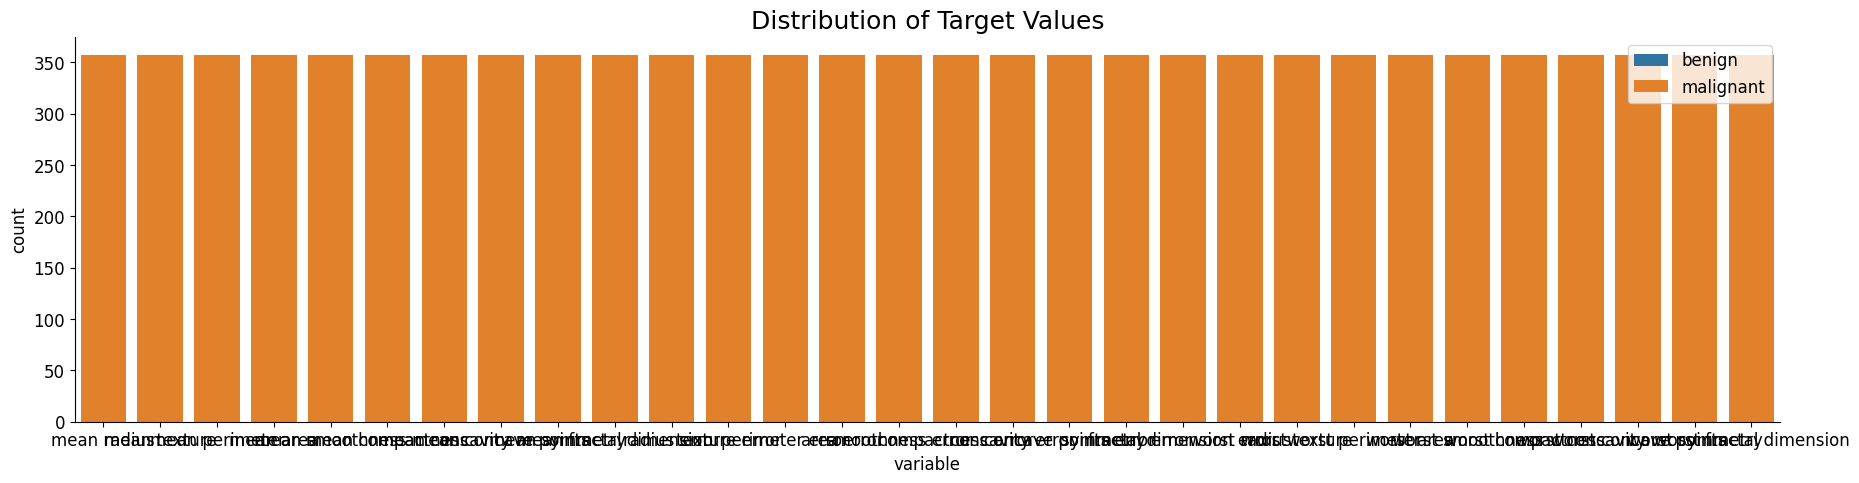

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
df_long = df.melt(id_vars=["target"], var_name="variable", value_name="value")
sns.countplot(data=df_long, x="variable", hue="target", dodge=False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(['benign', 'malignant'])
plt.title('Distribution of Target Values', fontsize=18)
plt.show()

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [100]:
num_cols = list(df.select_dtypes('float64').columns)
unrelated_num_cols = []
categorical_col = 'target'

for i in num_cols:
    # Perform Kruskal-Wallis test
    grouped_data = [df[i][df[categorical_col] == category] for category in df[categorical_col].unique()]
    statistic, p_value = stats.f_oneway(*grouped_data)

    # Set the significance level (alpha)
    alpha = 0.05

    # Print the results with appropriate text color
    if p_value < alpha:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[32m" + f"Reject the null hypothesis: There is a significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
    else:
        print( f"ANOVA statistic: {round(statistic, 2)}")
        print(f"p-value: {p_value}")
        print("\033[31m" + f"No significant relationship between {i} and {categorical_col}")
        print("\033[0m")  # Reset text color to default
        unrelated_num_cols.append(i)

ANOVA statistic: 646.98
p-value: 8.46594057226382e-96
Reject the null hypothesis: There is a significant relationship between mean radius and target

ANOVA statistic: 118.1
p-value: 4.0586360478986136e-25
Reject the null hypothesis: There is a significant relationship between mean texture and target

ANOVA statistic: 697.24
p-value: 8.43625103617395e-101
Reject the null hypothesis: There is a significant relationship between mean perimeter and target

ANOVA statistic: 573.06
p-value: 4.7345643103077244e-88
Reject the null hypothesis: There is a significant relationship between mean area and target

ANOVA statistic: 83.65
p-value: 1.051850359203376e-18
Reject the null hypothesis: There is a significant relationship between mean smoothness and target

ANOVA statistic: 313.23
p-value: 3.938263105887389e-56
Reject the null hypothesis: There is a significant relationship between mean compactness and target

ANOVA statistic: 533.79
p-value: 9.966555755074321e-84
Reject the null hypothesis: T

In [101]:
print(f'The columns that failed the ANOVA test are {unrelated_num_cols}. These columns don\'t help in making predictions.')

The columns that failed the ANOVA test are ['mean fractal dimension', 'texture error', 'smoothness error', 'symmetry error', 'fractal dimension error']. These columns don't help in making predictions.


In [102]:
fig = px.scatter(df,
                 x='mean texture',
                 color='target',
                 size='mean texture',
                 template='simple_white',
                 title='Cancer Mean Texture Spread',
                 labels={"mean texture": "Mean Texture", "target":"Target"},
                 hover_data=["target"])

fig.update_layout(xaxis_title="Mean Texture",yaxis_title=" ")

fig.show()

In [103]:
fig = px.scatter(df,
                 x="mean compactness",
                 size="mean compactness",
                 color="mean compactness",
                  labels={"mean compactness": "Mean Compactness"},
                 hover_data=["target"],
                 template='simple_white',
                 title="Cancer Compactness Mean")
fig.update_layout(xaxis_title="Mean Compactness",yaxis_title=" ")
fig.show()

In [104]:
fig = px.scatter(df,
                 x="symmetry error",
                 size='symmetry error',
                 color = 'symmetry error',
                 hover_data=["target"],
                 template='seaborn',
                 labels={"symmetry error": "Symmetry Error"},
                 title="Symmetry Error Spread")
fig.update_layout(xaxis_title="Symmetry Error",yaxis_title=" ")
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)'})
fig.show()

In [105]:
fig = px.scatter(df,
                 x="mean concave points",
                 size='mean concave points',
                 color="mean concave points",
                 hover_data=["target"],
                 template="simple_white",
                 labels={"mean concave points": "Mean Concave Points"},
                 title="Mean Concave Points Spread")
fig.update_layout(xaxis_title="Mean concave points",yaxis_title=" ")
fig.show()

In [106]:
#Dropping the unrelated cols we found out using ANOVA
df.drop(labels=unrelated_num_cols, axis=1, inplace=True)

In [107]:
#Columns in the dataframe after dropping columns
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype='object')

In [108]:
input_cols = df.columns[:-1]
target_col =  df.columns[-1]

In [109]:
inputs_df = df[list(input_cols)].copy()
inputs_df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
411,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.1967,...,12.410,26.44,79.93,471.4,0.1369,0.14820,0.1067,0.07431,0.2998,0.07881
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.00000,0.00000,0.1661,0.3163,...,11.660,24.77,74.08,412.3,0.1001,0.07348,0.0000,0.00000,0.2458,0.06592
40,13.440,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.2385,...,15.930,30.25,102.50,787.9,0.1094,0.20430,0.2085,0.11120,0.2994,0.07146
539,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,0.2037,0.2196,...,8.678,31.89,54.49,223.6,0.1596,0.30640,0.3393,0.05000,0.2790,0.10660
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.2121,...,15.030,32.01,108.80,697.7,0.1651,0.77250,0.6943,0.22080,0.3596,0.14310


In [110]:
targets = df[(target_col)]
targets.sample(5)

483    1
365    0
235    1
490    1
511    1
Name: target, dtype: int64

**Data Scaling**

In [111]:
scaler = MinMaxScaler()
scaler.fit(inputs_df[input_cols])
inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])
inputs_df[input_cols].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.356147,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.156437,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.229622,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,0.139091,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.233822,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


**Creating Covariance matrix and finding Eigenvalues and EigenVectors**

In [112]:
#Extracting input values
column_values = []
for i in range(len(inputs_df.columns)):
    column_values.append(inputs_df.iloc[:,i].values)

#Making Covariance Matrix
covariance_matrix = np.cov(column_values)

#Getting the EigenVectors and the EigenValues
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [113]:
print("Shape of eigenvalues:", eigen_values.shape)
print("Shape of eigenvectors:", eigen_vectors.shape)
print("Shape of covariance matrix:", covariance_matrix.shape)

Shape of eigenvalues: (25,)
Shape of eigenvectors: (25, 25)
Shape of covariance matrix: (25, 25)


In [114]:
#First Element of the Covariance Matrix
covariance_matrix[0]

array([0.027818  , 0.00785484, 0.02794603, 0.02458229, 0.00361231,
       0.01367458, 0.02108345, 0.02645754, 0.00341174, 0.01137405,
       0.01071215, 0.01042819, 0.00462112, 0.00246906, 0.0073333 ,
       0.02780391, 0.00811481, 0.02693902, 0.02196388, 0.0030081 ,
       0.0105267 , 0.01464405, 0.028038  , 0.00333488, 0.00013961])

In [115]:
#First Eigenvector
eigen_vectors[0]

array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [116]:
print('The first eigen value is',round(eigen_values[0],4))

The first eigen value is 0.3301


**Explained Variance**

In [117]:
explained_variance = []
c= 0
for i in range(len((eigen_values/(np.sum(eigen_values))*100))):
    c = c + np.around((eigen_values[i]/(np.sum(eigen_values))*100),3)
    while c < 92:
        explained_variance.append(c)
        print(f'At {i+1} PC, Explained Variance is {round(c,2)}%')
        break

At 1 PC, Explained Variance is 59.5%
At 2 PC, Explained Variance is 74.84%
At 3 PC, Explained Variance is 82.28%
At 4 PC, Explained Variance is 87.3%
At 5 PC, Explained Variance is 90.78%


In [118]:
variance_percentage = np.around(explained_variance[-1], 2)
num_principal_components = len(explained_variance)

print(f"Explained Variance Achieved : {variance_percentage}% , PCs needed : {num_principal_components}")

Explained Variance Achieved : 90.78% , PCs needed : 5


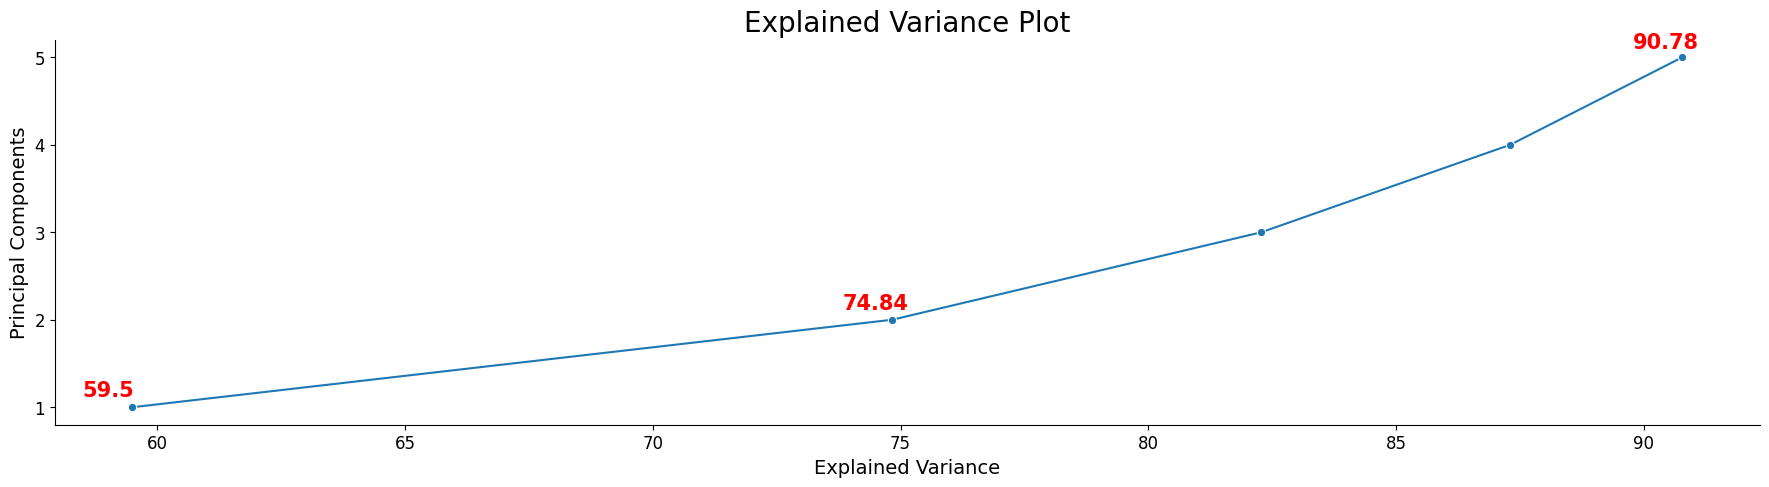

In [119]:
sns.lineplot(x=explained_variance,  y=range(1,len(explained_variance)+1), marker='o')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.annotate(f'{round(explained_variance[0],2)}', (round(explained_variance[0],2)-1, 1.12),
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[1],2)}', (round(explained_variance[1],2)-1, 2.12),
             fontsize=15, fontweight='bold', color='red')
plt.annotate(f'{round(explained_variance[4],2)}', (round(explained_variance[4],2)-1, 5.1),
             fontsize=15, fontweight='bold', color='red')
plt.yticks(range(1,len(explained_variance)+1,1))
plt.title('Explained Variance Plot', fontsize=20)
plt.xlabel('Explained Variance', fontsize=14)
plt.ylabel('Principal Components',fontsize=14)
plt.show()

**Displaying the linear transformations**

In [120]:
# function to convert column of matrix to 1D vector:
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

def plot_vectors(vectors, colors, labels):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each.

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]]
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.

    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'], ['Vector 1', 'Vector 2'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],angles='xy', scale_units='xy', scale=1, color=colors[i],label=labels[i])

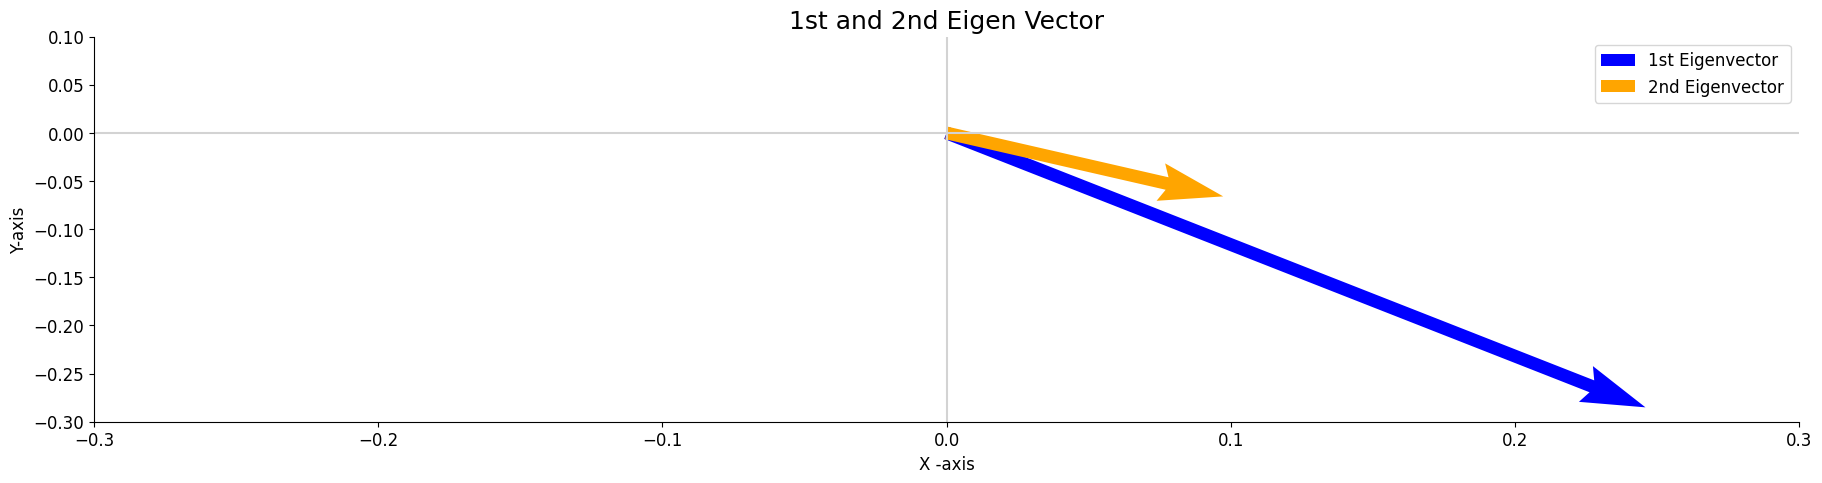

In [121]:
plot_vectors([eigen_vectors[0], eigen_vectors[1]] , ['blue', 'orange'], ['1st Eigenvector', '2nd Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('1st and 2nd Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.ylabel('Y-axis')
plt.xlim(-0.3, 0.3)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

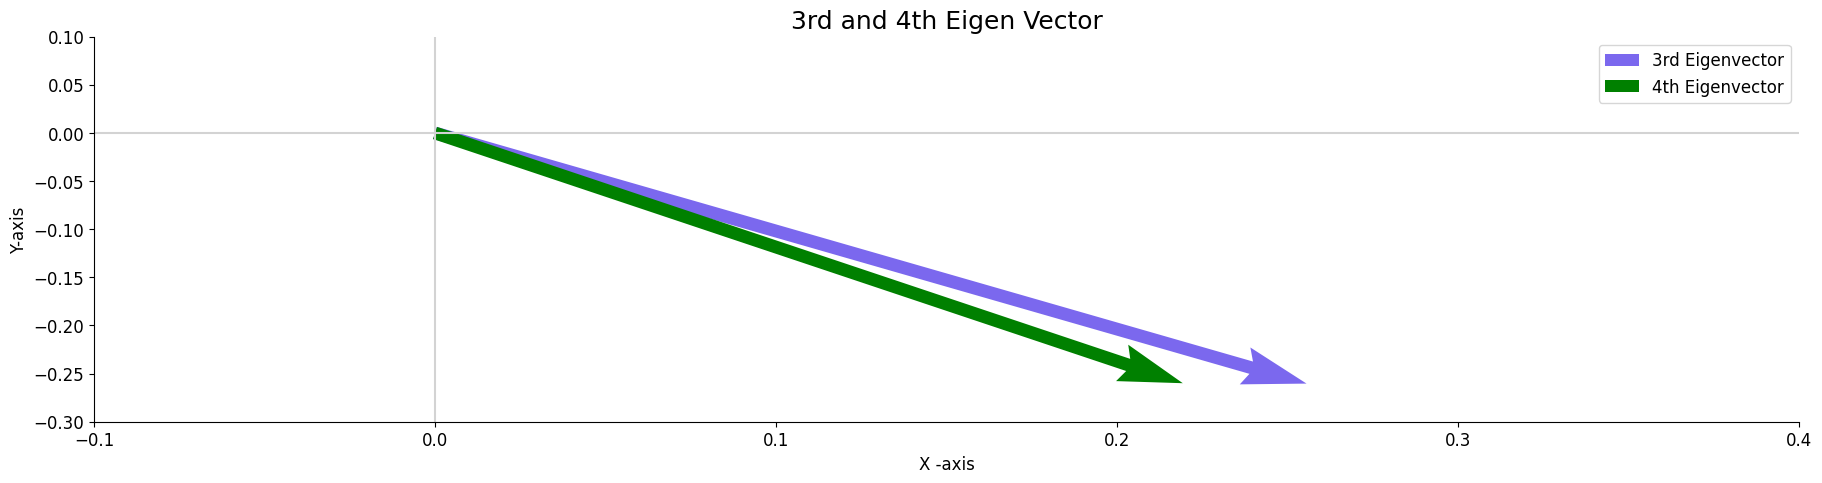

In [122]:
plot_vectors([eigen_vectors[2], eigen_vectors[3]] , ['mediumslateblue', 'green'], ['3rd Eigenvector', '4th Eigenvector'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('3rd and 4th Eigen Vector', fontsize=18)
plt.xlabel('X -axis')
plt.legend(['3rd Vector', '4th Vector'])
plt.ylabel('Y-axis')
plt.xlim(-0.1, 0.4)
_ = plt.ylim(-0.3, 0.1)
plt.legend()
plt.show()

**Transforming the entire data**

In [123]:
pc = eigen_vectors[0:len(explained_variance)]
print(f'The shape of the Principal Component Matrix is {pc.shape}')

The shape of the Principal Component Matrix is (5, 25)


In [124]:
print('The Original PC array')
pc[0]

The Original PC array


array([ 0.24595212, -0.28506715, -0.05288632,  0.04299417,  0.07429854,
        0.04581977,  0.07854236, -0.17635877, -0.03245573,  0.21481119,
        0.00737844,  0.01610437,  0.12459388, -0.18581714, -0.24581679,
       -0.17792538,  0.03830878,  0.13958935, -0.70693551,  0.1966754 ,
       -0.15904637,  0.07589162,  0.07905804,  0.11604536,  0.09432928])

In [125]:
print('The Transpose of PC array')
pc.T[0]

The Transpose of PC array


array([0.24595212, 0.09735703, 0.25557267, 0.21928724, 0.10784383])

In [126]:
transformed_df = np.dot(inputs_df.iloc[:,0:len(inputs_df.columns)],pc.T)
new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2','PC3', 'PC4', 'PC5'])
new_df['Target'] = df['target'].values
new_df.head()

,PC1,PC2,PC3,PC4,PC5,Target
0,0.034773,0.398491,0.686401,-1.055867,-0.138927,0
1,-0.154531,0.489669,0.468577,-0.786602,0.111376,0
2,-0.119872,0.437182,0.444838,-1.045942,0.024061,0
3,0.240011,0.060654,0.452463,-1.322787,-0.231652,0
4,-0.060162,0.451352,0.439179,-0.755014,0.015844,0


In [127]:
new_df['Target'] = new_df['Target'].astype('int')

In [128]:
fig = px.scatter(new_df, x='PC1', y='PC2', color='Target', template="simple_white")
fig.update_layout(title='Top 2 PCs Scatterplot', title_font_size=18)
fig.update_xaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')
fig.update_yaxes(showgrid=False, zeroline=True, zerolinewidth=3, zerolinecolor='lightgray')

# Add annotations for quadrants
fig.add_annotation(x=-0.45, y=0.1, text='Quadrant 2', font_size=14, font_color='red')
fig.add_annotation(x=0.23, y=0.1, text='Quadrant 1', font_size=14, font_color='red')

fig.update_xaxes(title='PC1')
fig.update_yaxes(title='PC2')

fig.show()

In [130]:
# Class 0 Individuals
new_df[new_df.Target==0].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
329,-0.010508,0.209553,0.289750,-0.737246,0.017910,0
11,-0.033305,0.315312,0.391517,-0.836661,0.044467,0
514,-0.046040,0.232222,0.256374,-0.639691,0.011953,0
566,-0.170689,0.321391,0.178029,-0.798641,0.182421,0
25,-0.015917,0.369193,0.462055,-1.052085,-0.173009,0


In [131]:
# Class 0 Individuals
new_df[new_df.Target==0].sample(5)

,PC1,PC2,PC3,PC4,PC5,Target
31,0.100619,0.099761,0.373219,-0.949803,-0.091750,0
171,-0.022023,0.196444,0.297055,-0.754436,0.010297,0
121,-0.047431,0.380194,0.458849,-0.855145,-0.009178,0
263,-0.060471,0.258713,0.228840,-0.564014,0.072919,0
517,-0.103692,0.398549,0.425561,-0.829075,0.020148,0


**Handling Class Imbalance**

In [132]:
label, counts = np.unique(targets, return_counts=True)
# compute the class weights
counts = max(counts) / counts
class_weights = dict(zip(label, counts))

print('=== CLASS WEIGHTS ===')
print(class_weights)

=== CLASS WEIGHTS ===
{0: 1.6839622641509433, 1: 1.0}


**Splitting Data **

In [133]:
label, counts = np.unique(targets, return_counts=True)
# compute the class weights
counts = max(counts) / counts
class_weights = dict(zip(label, counts))

print('=== CLASS WEIGHTS ===')
print(class_weights)


=== CLASS WEIGHTS ===
{0: 1.6839622641509433, 1: 1.0}


In [136]:
#Splitting the data into train and validation set
train_inputs, val_inputs, train_targets, val_targets = train_test_split(new_df, targets, test_size=0.25, random_state=42)

In [137]:
print('X_train Shape -',train_inputs.shape,',', 'y_train Shape -', train_targets.shape)
print('X_test shape -', val_inputs.shape,',','y_test shape -', val_targets.shape)

X_train Shape - (426, 6) , y_train Shape - (426,)
X_test shape - (143, 6) , y_test shape - (143,)


In [138]:
#Creating a list of classifier models
names = ['Logistic Regression', "KNN", "Linear SVM","Gradient Boosting", "Decision Tree", "Random Forest"]
classifiers = [
    LogisticRegression(solver='liblinear', class_weight=class_weights, random_state=42),
    KNeighborsClassifier(n_neighbors=3, weights= 'distance'),
    SVC(kernel="linear", C=0.025, class_weight=class_weights, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    DecisionTreeClassifier(max_depth=5, class_weight=class_weights, random_state=42),
    RandomForestClassifier(max_depth=5, n_estimators=100, class_weight=class_weights, random_state=42)]

In [139]:
# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Initialize an empty list to store scores
scores = []

for name, clf in zip(names, classifiers):
    # Perform k-fold cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, train_inputs, train_targets, cv=num_folds)
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)

# Create a DataFrame to store the results
scores_df = pd.DataFrame()
scores_df['Name'] = names
scores_df['CV Mean score'] = np.around(scores, 3)

# Sort the DataFrame by score in descending order
sorted_scores_df = scores_df.sort_values('CV Mean score', ascending=False)
sorted_scores_df

,Name,CV Mean score
0,Logistic Regression,1.0
1,KNN,1.0
2,Linear SVM,1.0
3,Gradient Boosting,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


**Model Accuracy**

In [144]:
# Define the number of folds for cross-validation
num_folds = 5  # You can adjust this as needed

# Initialize an empty list to store scores
scores = []

for name, clf in zip(names, classifiers):
    # Perform k-fold cross-validation and calculate the mean score
    cv_scores = cross_val_score(clf, train_inputs, train_targets, cv=num_folds)
    mean_score = np.mean(cv_scores)
    scores.append(mean_score)

# Create a DataFrame to store the results
scores_df = pd.DataFrame()
scores_df['Name'] = names
scores_df['CV Mean score'] = np.around(scores, 3)

# Sort the DataFrame by score in descending order
sorted_scores_df = scores_df.sort_values('CV Mean score', ascending=False)
sorted_scores_df

,Name,CV Mean score
0,Logistic Regression,1.0
1,KNN,1.0
2,Linear SVM,1.0
3,Gradient Boosting,1.0
4,Decision Tree,1.0
5,Random Forest,1.0


In [145]:
#Initiating the model
model = LogisticRegression(solver='liblinear', random_state=42,  n_jobs=-1, class_weight=class_weights)

#fitting the model
model.fit(train_inputs, train_targets)

#making the predictions
LRtrain_preds = model.predict(val_inputs)

#Creating the confusion matrix
confusionmatrix = np.around(confusion_matrix(val_targets, LRtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix, template='ggplot2',text_auto=True, aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

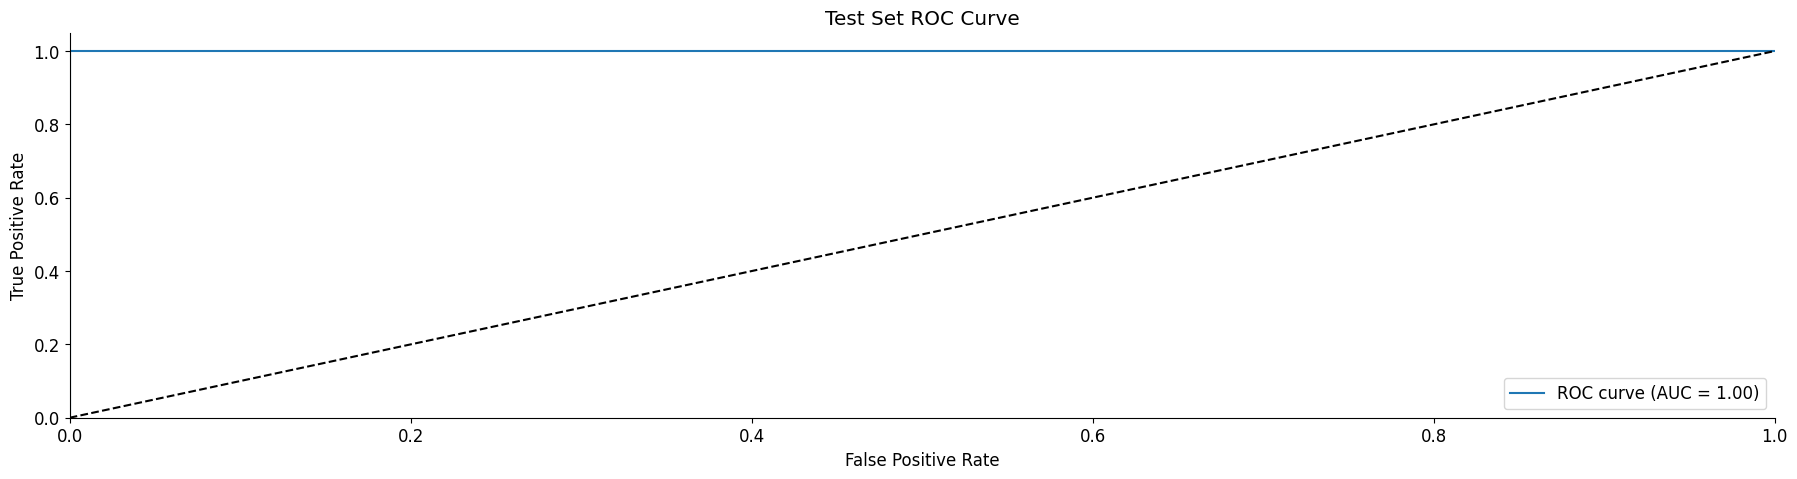

In [146]:
# Assuming you have your model predictions and true labels
y_pred = model.predict(val_inputs)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(val_targets, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(val_targets, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Set ROC Curve')
plt.legend(loc="lower right")
plt.show()

Logistic Regression Classification Report

In [147]:
print(classification_report(val_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        89

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



In [148]:
print(classification_report(val_targets, LRtrain_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        89

    accuracy                           1.00       143
   macro avg       1.00      1.00      1.00       143
weighted avg       1.00      1.00      1.00       143



# Linear Discriminant Analysis (LDA)

In [149]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [150]:
# Create an instance of LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
# Fit the model to the data and transform the data using the fit
X_lda = lda.fit_transform(X, y)
# Print the shape of the original data and the transformed data
print("Original Data shape:",X.shape, "\nModified Data shape:", X_lda.shape)

Original Data shape: (569, 25) 
Modified Data shape: (569, 1)


In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.2, random_state=42)

In [152]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

# LDA Predictions and Performance

In [153]:
LDAtrain_preds = lda.predict(X_train)
confusionmatrix = np.around(confusion_matrix(y_train, LDAtrain_preds, normalize='true'),3)

#Plotting the Confusion Matrix
fig = px.imshow(confusionmatrix,
                template='simple_white',
                text_auto=True,
                aspect="auto",
                labels=dict(x="Predicted Label", y="Correct Label", color='Value'))
fig.update_xaxes(side="bottom")
fig.show()

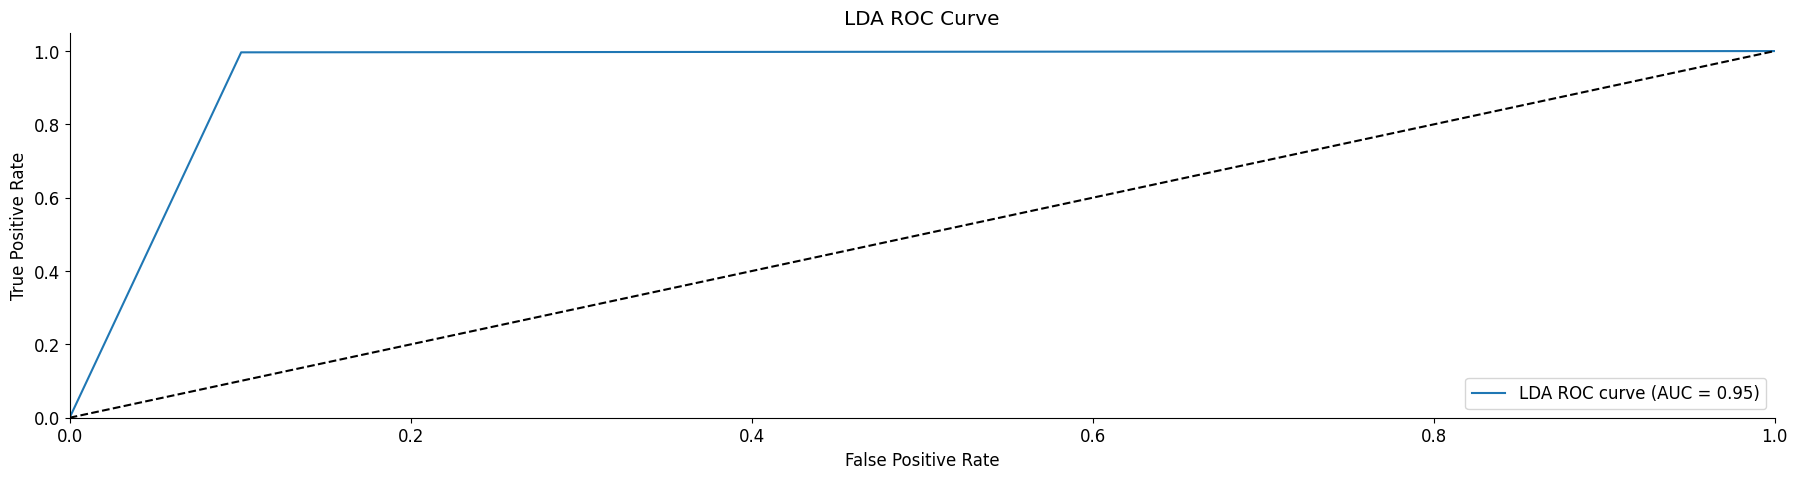

In [154]:
# Assuming you have your model predictions and true labels
y_pred = lda.predict(X_train)  # Replace with your model's predictions
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

# Calculate AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_train, y_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='LDA ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [155]:
misclassified_count = len(y_train[y_train != LDAtrain_preds])
total_cases = len(y_train)
error_rate = np.around((misclassified_count / total_cases) * 100, 3)

print(f"{misclassified_count} / {total_cases} cases misclassified by LDA, Error rate : {error_rate}%.")

18 / 455 cases misclassified by LDA, Error rate : 3.956%.


The notebook began with an introduction to the breast cancer dataset, highlighting its significance in cancer research. It emphasized the need for effective feature extraction techniques to uncover meaningful patterns within the data.

Comprehensive explanation of PCA was provided, outlining its core principles and application in reducing the dimensionality of a dataset while preserving its essential variance. The emphasis was on transforming the original features into a new set of uncorrelated variables, known as principal components. We also learnt that you can create the class weight dictionary and ensure each class weightage comes out the same and then this parameter can be given to the model to make better predictions for cases where there is a class imbalance.

The notebook demonstrated the step-by-step implementation of PCA on the breast cancer dataset using a popular Python library, likely scikit-learn. This involved standardizing the data, computing the covariance matrix, obtaining eigenvalues and eigenvectors, and finally, selecting the principal components. We also delved into how Eigenvalues and Eigenvectors get calculated.

Visualizations, such as scree plots and cumulative explained variance plots, were included to illustrate the contribution of each principal component to the overall variance. These visuals aided in determining the optimal number of principal components to retain.

While the notebook briefly touched upon Linear Discriminant Analysis (LDA), the primary focus remained on contrasting PCA's unsupervised nature with LDA's supervised approach. The key distinction was likely highlighted in terms of maximizing variance (PCA) versus maximizing class separability (LDA).

Metrics, such as explained variance ratio, cumulative explained variance, and possibly reconstruction error, were discussed to evaluate the performance of PCA in capturing and retaining the essential information present in the breast cancer dataset.

The notebook concluded with an interpretation of the results, emphasizing the utility of PCA in reducing the dimensionality of the higher dimension dataset while retaining a significant portion of the original information. We also found that Linear Discriminant Analysis (LDA) can be applied to multiclass classification problems however it fails to create a new axis that makes the classes linearly seperable.


# Breast Cancer Accuracy

In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')


In [5]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Distribution of malignant and benign tumors

In [7]:
df.describe().drop("id", axis=1).T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


B    357
M    212
Name: diagnosis, dtype: int64


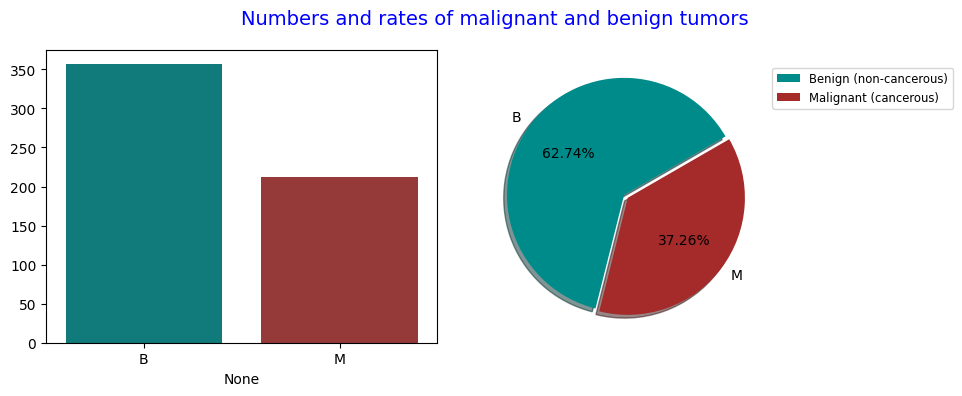

In [8]:
cols = ["darkcyan", "brown"]
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.barplot(x=df["diagnosis"].value_counts().index, y=df["diagnosis"].value_counts(), palette=cols)
plt.ylabel("")
plt.subplot(1,2,2)
plt.pie(x=df["diagnosis"].value_counts(), labels=df["diagnosis"].value_counts().index, shadow=True,
        explode=[0.02, 0.02], startangle=30, autopct='%0.2f%%', colors=cols)
plt.legend(labels=["Benign (non-cancerous)", "Malignant (cancerous)"], loc=(1,0.8), fontsize="small")
plt.suptitle("Numbers and rates of malignant and benign tumors", fontsize=14, color="b")
plt.tight_layout()
print(df.diagnosis.value_counts())
plt.show()

In [9]:
# 1 for Malignant, 0 for Benign

df["diagnosis"] = df["diagnosis"].map({"B": 0, "M":1})

Correlation Between Features

In [10]:
corr = df.drop("id", axis=1).corr()
cmap = sns.diverging_palette(25, 250, as_cmap=True)
corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '1px', 'font-size': '8pt'})

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838,0.567134,-0.008303,0.556141,0.548236,-0.067016,0.292999,0.253730,0.408042,-0.006522,0.077972,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


# Correlation between features and target variable

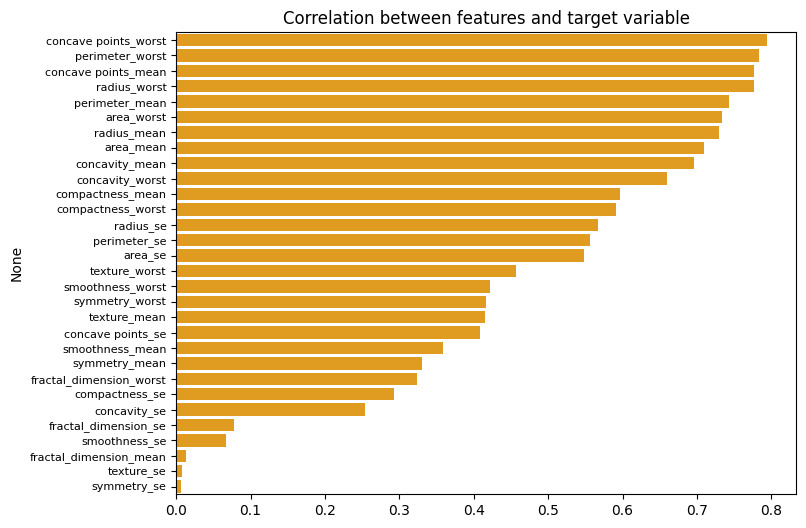

In [11]:
corr = df.drop("id", axis=1).corr()["diagnosis"].abs().sort_values(ascending=False).drop("diagnosis")

plt.figure(figsize=(8,6))
sns.barplot(x=corr, y=corr.index, color="orange")
plt.title("Correlation between features and target variable")
plt.yticks(fontsize= 8)
plt.xlabel("")
plt.show()

# Standardization

In [12]:
scaler = StandardScaler()
df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,84358402,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Train/Test Split

In [14]:
y = df["diagnosis"]
X = df.drop(["id", "diagnosis"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

creating Models

In [15]:
model_list = [LogisticRegression, RandomForestClassifier, KNeighborsClassifier, SVC, XGBClassifier, DecisionTreeClassifier]

model_name_list = []
model_accuracies = []

for i in model_list:
    model = i().fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    model_name_list.append(model_name)
    model_accuracies.append(accuracy)

    print(f"{model_name} accuracy: {accuracy:.3f}\n")

LogisticRegression accuracy: 0.979

RandomForestClassifier accuracy: 0.972

KNeighborsClassifier accuracy: 0.958

SVC accuracy: 0.972

XGBClassifier accuracy: 0.958

DecisionTreeClassifier accuracy: 0.937



LogisticRegression accuracy: 0.98


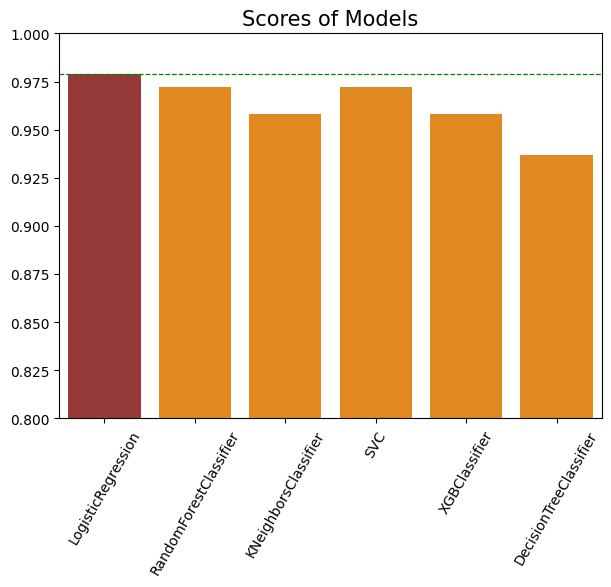

In [16]:
fig, ax=plt.subplots(figsize=(7,5))
cols = ["darkorange" if i < (max(model_accuracies)) else "brown" for i in model_accuracies]
sns.barplot(x= model_name_list, y= model_accuracies, ax=ax, palette=cols)
plt.ylim(0.8, 1)
plt.title("Scores of Models", fontsize=15)
plt.axhline(0.9790, lw=0.9, ls="--", color="green")
plt.xticks(rotation=60)
print(f"LogisticRegression accuracy: {np.max(model_accuracies):.2f}")
plt.show()

# Model Tuning

In [17]:
logistic = LogisticRegression()

param_list = {"C": np.arange(0.0001, 1.01, 0.05),
             "penalty": ['l1', 'l2'],
             "solver": ['liblinear', 'lbfgs']}

model_tuning = GridSearchCV(estimator=logistic, param_grid=param_list, cv=10).fit(X_train, y_train)
y_pred_final = model_tuning.best_estimator_.predict(X_test)
accuracy_final =accuracy_score(y_test, y_pred_final)
print(f"Accuracy after tuning: {accuracy_final:.3f}")


Accuracy after tuning: 0.993


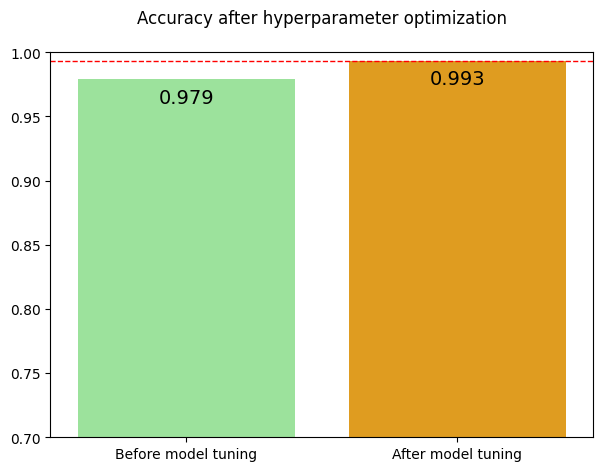

In [18]:
plt.figure(figsize=(7,5))
sns.barplot(x=["Before model tuning", "After model tuning"], y=[model_accuracies[0], accuracy_final],
            palette=["lightgreen", "orange"])
plt.ylim(0.7, 1)
plt.axhline(accuracy_final, ls="--", lw=1, color="r")
plt.title("Accuracy after hyperparameter optimization\n")
plt.text(0.9, 0.975, "0.993", fontsize=14)
plt.text(-0.1, 0.960, "0.979", fontsize=14)
plt.show()

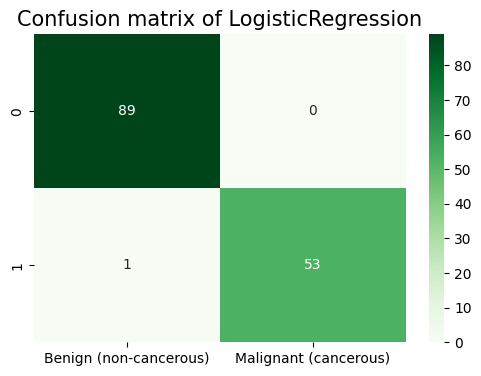

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_final), annot=True, cmap="Greens",
            xticklabels=["Benign (non-cancerous)", "Malignant (cancerous)"])
plt.title("Confusion matrix of LogisticRegression", fontsize=15)
plt.show()

In [20]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        89
           1       1.00      0.98      0.99        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



# ROC

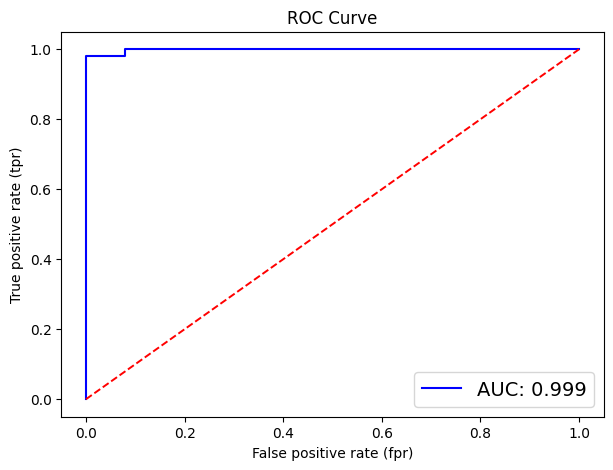

In [21]:
y_prob = model_tuning.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color="blue", label= f"AUC: {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve")
plt.show()


In [22]:
features_importance = pd.DataFrame(model_tuning.best_estimator_.coef_, index=["importance_value"], columns=X_train.columns).T
features_importance = features_importance.sort_values(by= "importance_value",ascending=False)
features_importance.head()

,importance_value
texture_worst,0.438802
radius_worst,0.394302
concave points_mean,0.375444
concave points_worst,0.373991
area_worst,0.373601


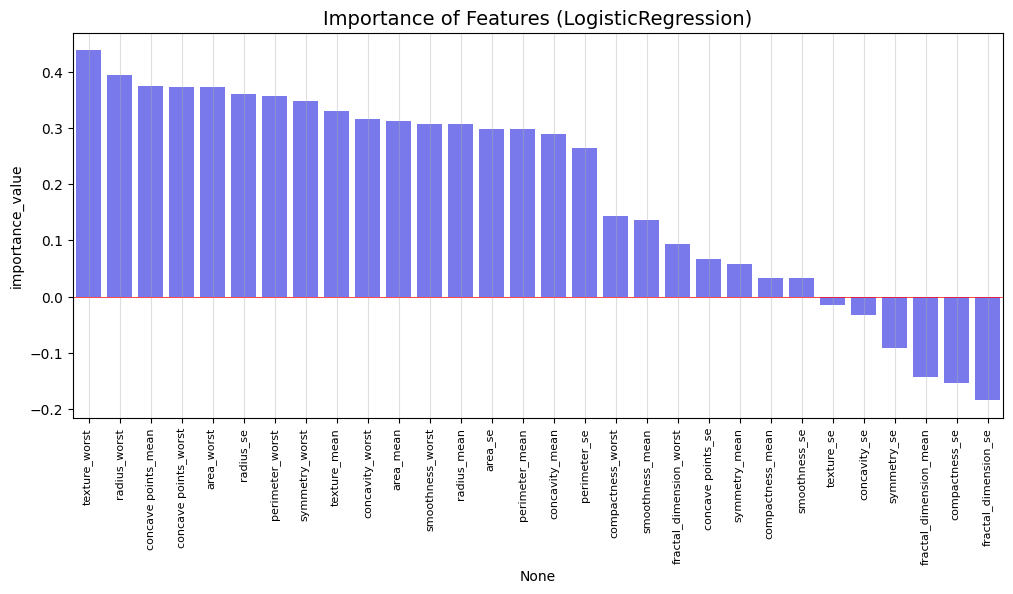

In [23]:
plt.figure(figsize=(12,5))
sns.barplot(x=features_importance.index, y=features_importance.importance_value, color="blue", alpha=0.6)
plt.xticks(fontsize= 8)
plt.xticks(rotation=90)
plt.grid(axis="x", alpha=0.4)
plt.axhline(0, lw=0.5, color="r")
plt.title("Importance of Features (LogisticRegression)", fontsize=14)
plt.show()